# PROYECTO FINAL: ANÁLISIS  DE LA CLASIFICACIÓN SOCIAL DE JÓVENES QUE NO ESTUDIAN NO TRABAJAN NI ESTAN ENFERMOS (NINI'S)

## Nombres:  
    - Ivan Fernando Mujica Mamani 
    - Ever Favio Argollo Ticona
    
## Docente: Phd. Sebastian Rios

### PARTE Nro. 1
### Describa el contexto asociado al dataset y el proceso que genera los datos. ¿Qué representa un registro? ¿Cómo se obtienen los datos?

Se trata de una colección de variables sociales recogidos por la Encuesta Nacional de Hogares 2019 que realiza el Instituto Nacional de Estadística de Bolivia anualmente. 

El fenomeno de los Nini's es una problemática latinoamericana que ubica a la característica de los jóvenes que no estudian ni trabajan ni estan enfermos (Nini's).

Se ha demostrado que la productividad y el crecimiento económico de largo plazo dependen de la calidad del capital humano de una sociedad, necesario para impulsar la innovación y adaptar nuevas tecnologías (Hanushek y Woessmann, 2008). La acumulación de capital humano en toda la población no sólo estimulará el crecimiento económico en general, sino que también dará forma a la futura distribución del ingreso y generará oportunidades para que los hogares de bajos ingresos mejoren su situación. La mayor parte de los jóvenes, esta etapa del ciclo de vida se caracteriza por el cambio, la vulnerabilidad y el desarrollo de la autoestima y del sentido de pertenencia. Es probable que necesiten el apoyo de una supervisión y orientación especializadas. En resumen, para los jóvenes que están fuera del sistema educativo y del mercado laboral puede ser especialmente difícil durante estos años afrontar los retos de la vida y desarrollar todo su potencial (Grogger, 1997; Jacob y Lefgren, 2003).

Para entender el fenomeno NINI y por qué es esencial contar con un marco conceptual de los múltiples factores que influyen en las decisiones de los jóvenes relacionadas a la escuela y el trabajo. El gráfico siguiente proporciona una clasificación sencilla de los procesos de transición en el uso del tiempo de los jóvenes en América Latina.

Éstos pueden estar en la escuela, trabajando, haciendo ambas cosas o sin hacer ninguna de ellas (es decir, como ninis). A los 15 años, más del 80% de los jóvenes en América Latina están en la escuela y cerca del 10% ya son ninis. Al recorrer el eje horizontal hacia cohortes de más edad, la proporción de jóvenes escolarizados desciende, y el índice de los que están trabajando o viviendo como ninis aumenta. Como muestran los datos regionales presentados en de Hoyos, Rogers y Popova (2015), la transición de la escuela al trabajo o al estado de nini en América Latina se intensifica
en los jóvenes que tienen entre 15 y 18 años, aunque una minoría significa tiva todavía se encuentra en la escuela incluso hasta los 24 años.

<img src="graph_nini.png" width=400 height=400 />



In [5]:
import os
import pyreadstat
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import sys

In [6]:
print(sys.version)

3.6.13 (default, Feb 19 2021, 05:17:09) [MSC v.1916 64 bit (AMD64)]


In [7]:
os.chdir('./')

In [8]:
df, meta = pyreadstat.read_sav("EH2019_Persona.sav", encoding="latin1")
df.head()

,folio,depto,area,nro,s02a_02,s02a_03,s02a_04a,s02a_04b,s02a_04c,s02a_05,...,yhog,yhogpc,z,zext,p0,p1,p2,pext0,pext1,pext2
0,111-00416110273-A-0021,1.0,1.0,1.0,1.0,42.0,10.0,2.0,1977.0,1.0,...,3350.0,558.333313,1020.330017,494.549988,1.0,0.452791,0.20502,0.0,0.0,0.0
1,111-00416110273-A-0021,1.0,1.0,2.0,2.0,36.0,8.0,9.0,1983.0,2.0,...,3350.0,558.333313,1020.330017,494.549988,1.0,0.452791,0.20502,0.0,0.0,0.0
2,111-00416110273-A-0021,1.0,1.0,3.0,1.0,19.0,25.0,4.0,2000.0,3.0,...,3350.0,558.333313,1020.330017,494.549988,1.0,0.452791,0.20502,0.0,0.0,0.0
3,111-00416110273-A-0021,1.0,1.0,4.0,2.0,13.0,5.0,10.0,2006.0,3.0,...,3350.0,558.333313,1020.330017,494.549988,1.0,0.452791,0.20502,0.0,0.0,0.0
4,111-00416110273-A-0021,1.0,1.0,5.0,1.0,3.0,14.0,3.0,2016.0,3.0,...,3350.0,558.333313,1020.330017,494.549988,1.0,0.452791,0.20502,0.0,0.0,0.0


In [9]:
# Categorizaciónn de las variables Depto y area
df['depto'] = df['depto'].map({1:'Chuquisaca', 2:'La Paz', 3:'Cochabamba', 4:'Oruro', 5:'Potosí', 6:'Tarija', 7:'Santa Cruz', 8:'Beni', 9:'Pando'})
df['depto'] = df['depto'].astype('category')
df['area'] = df['area'].map({1:'Urbana', 2:'Rural'})
df['area'] = df['area'].astype('category')
#df['depto'].value_counts()
#df.dtypes

In [10]:
# Creación de variables
# Edad categorizada
df['sexo'] = df['s02a_02']
df['sexo'] = df['sexo'].map({1:'Hombre', 2: 'Mujer'})
df['sexo'] = df['sexo'].astype('category')

df['edad'] = np.nan
df.loc[(df.s02a_03>=0) & (df.s02a_03<=14) , 'edad'] = 1
df.loc[(df.s02a_03>=15) & (df.s02a_03<=24), 'edad'] = 2 
df.loc[(df.s02a_03>=25), 'edad'] = 3 
df['edad'] = df['edad'].map({1:'Niños', 2:'Jóvenes', 3:'Adultos'})
df['edad'] = df['edad'].astype('category')


In [11]:
df.loc[(df.s06a_09==1) & (df.s06a_10==6) & (df.edad=='Jóvenes'), 'estudio'] = 1
df.loc[(df.s06a_09==2) & (df.s06a_10==11) & (df.edad=='Jóvenes'), 'trab_domes'] = 1
df.loc[(df.s06a_09==4) & (df.s06a_10==9) & (df.edad=='Jóvenes'), 'enfermo'] = 1
df.loc[(df.estudio!= 1) & (df.trab_domes!=1) & (df.enfermo!=1) & (df.edad=='Jóvenes'),'nini'] = 1

df['class'] = np.nan
df.loc[(df.estudio==1), 'class']    = 1
df.loc[(df.trab_domes==1), 'class'] = 2
df.loc[(df.enfermo==1), 'class']    = 3
df.loc[df.nini==1, 'class']       = 4
df.loc[(df.ocupado==1) & (df.edad=='Jóvenes'), 'class'] =5
df['class'] = df['class'].map({1:'Sólo estudia',2:'Trabajo Doméstico',3:'Enfermo',4:'Nini',5:'Trabaja'})
df['class'] = df['class'].astype('category')
df['class'].value_counts()
#clas 1 "Sólo estudia"
#clas 2 "trabajo domestico"
#clas 3 "Enfermo"
#clas 4 "NiNi"
#clas 5 "Trabaja"


Sólo estudia         2910
Trabaja              2854
Nini                  782
Trabajo Doméstico     449
Enfermo                48
Name: class, dtype: int64

In [13]:
df.describe()

,nro,s02a_02,s02a_03,s02a_04a,s02a_04b,s02a_04c,s02a_05,s02a_06a,s02a_06b,s02a_06c,...,p0,p1,p2,pext0,pext1,pext2,estudio,trab_domes,enfermo,nini
count,39605.000000,39605.000000,39605.000000,39605.000000,39605.000000,39605.000000,39605.000000,39605.000000,39605.000000,39605.000000,...,39565.000000,39565.000000,39565.000000,39565.000000,39565.000000,39565.000000,2910.0,449.0,48.0,3636.0
mean,2.636309,1.512814,29.692110,15.355536,6.568161,1989.207070,2.590582,619.311754,632.779775,988.903371,...,0.374750,0.141145,0.076525,0.119348,0.046877,0.027803,1.0,1.0,1.0,1.0
std,1.605397,0.499842,21.056893,8.748357,3.406496,21.060627,1.821040,483.032389,479.645351,89.430191,...,0.484065,0.237917,0.172320,0.324202,0.160020,0.120600,0.0,0.0,0.0,0.0
min,1.000000,1.000000,0.000000,1.000000,1.000000,1920.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0
25%,1.000000,1.000000,12.000000,8.000000,4.000000,1974.000000,1.000000,2.000000,1.000000,997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0
50%,2.000000,2.000000,26.000000,15.000000,7.000000,1993.000000,3.000000,997.000000,997.000000,997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0
75%,4.000000,2.000000,44.000000,23.000000,10.000000,2007.000000,3.000000,997.000000,997.000000,997.000000,...,1.000000,0.232415,0.054017,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0
max,15.000000,2.000000,98.000000,31.000000,12.000000,2019.000000,13.000000,997.000000,997.000000,997.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0


# Variables explicativas 

In [14]:
df['indi']= np.nan
df.loc[(df.s03a_04==1), 'indi'] = 1
df.loc[(df.s03a_04==2) | (df.s03a_04==3), 'indi'] = 0
df['indi'] = df['indi'].map({0:'No pertenece', 1:'Pertenece'})
df['indi'] = df['indi'].astype('category')
# df['indi'].value_counts()
# 1 : indigena
# 0:  no indigena

# nivel educativo
df['niv_ed1'] = np.nan
df.loc[df.niv_ed==0,'niv_ed1'] = 0
df.loc[(df.niv_ed==1)|(df.niv_ed==2),'niv_ed1'] = 1
df.loc[(df.niv_ed==3)|(df.niv_ed==4),'niv_ed1'] = 2
df.loc[(df.niv_ed==5),'niv_ed1'] = 3
df.loc[(df.niv_ed==6)|(df.niv_ed==7),'niv_ed1'] = 4
df.loc[(df.niv_ed==9),'niv_ed1'] = 5
df['niv_ed1'] = df['niv_ed1'].map({0:'Ninguno', 1:'Primaria',2:'Secundaria', 3:'Superior',4:'Otros', 5:'Sin especificar'})
df['niv_ed1'] = df['niv_ed1'].astype('category')
#print(df['niv_ed1'].value_counts())
# 0: ninguno
# 1: primaria
# 2: secundaria
# 3: superior
# 4: otros
# 5: sin especificar

# ESTADO CIVIL
df['e_civ']= np.nan
df.loc[df.s02a_10==1, 'e_civ']=1
df.loc[(df.s02a_10==2)|(df.s02a_10==3), 'e_civ']=2
df.loc[(df.s02a_10==4)|(df.s02a_10==5)|(df.s02a_10==3), 'e_civ']=3
df['e_civ'] = df['e_civ'].map({1:'Soltero', 2:'Unido', 3:'Sep/Viu/Divorciado'})
df['e_civ'] = df['e_civ'].astype('category')
print(df['e_civ'].value_counts())
# 1: Soltero
# 2: Unido
# 3: Sep/Viu/Divorciado
#df['e_civ'].value_counts()

# hogares con jovenes 
df['jov'] = np.nan
df.loc[df.edad==2,'jov']= 1 
df['hjov'] = df.groupby(['folio','nro'])['jov'].transform('sum')

Soltero               11552
Unido                 10509
Sep/Viu/Divorciado     6526
Name: e_civ, dtype: int64


In [16]:
columnas_elegidas = ['depto','area','folio','s02a_03','phrs','shrs','tothrs','yprilab','yseclab','ylab','ynolab',
                     'yper','yhog','yhogpc','z','indi','edad','sexo','niv_ed1','e_civ','class']
df1 = pd.DataFrame(df, columns=columnas_elegidas)
#df1.describe()
#print(meta.column_names_to_labels)

# **Variables numéricas**

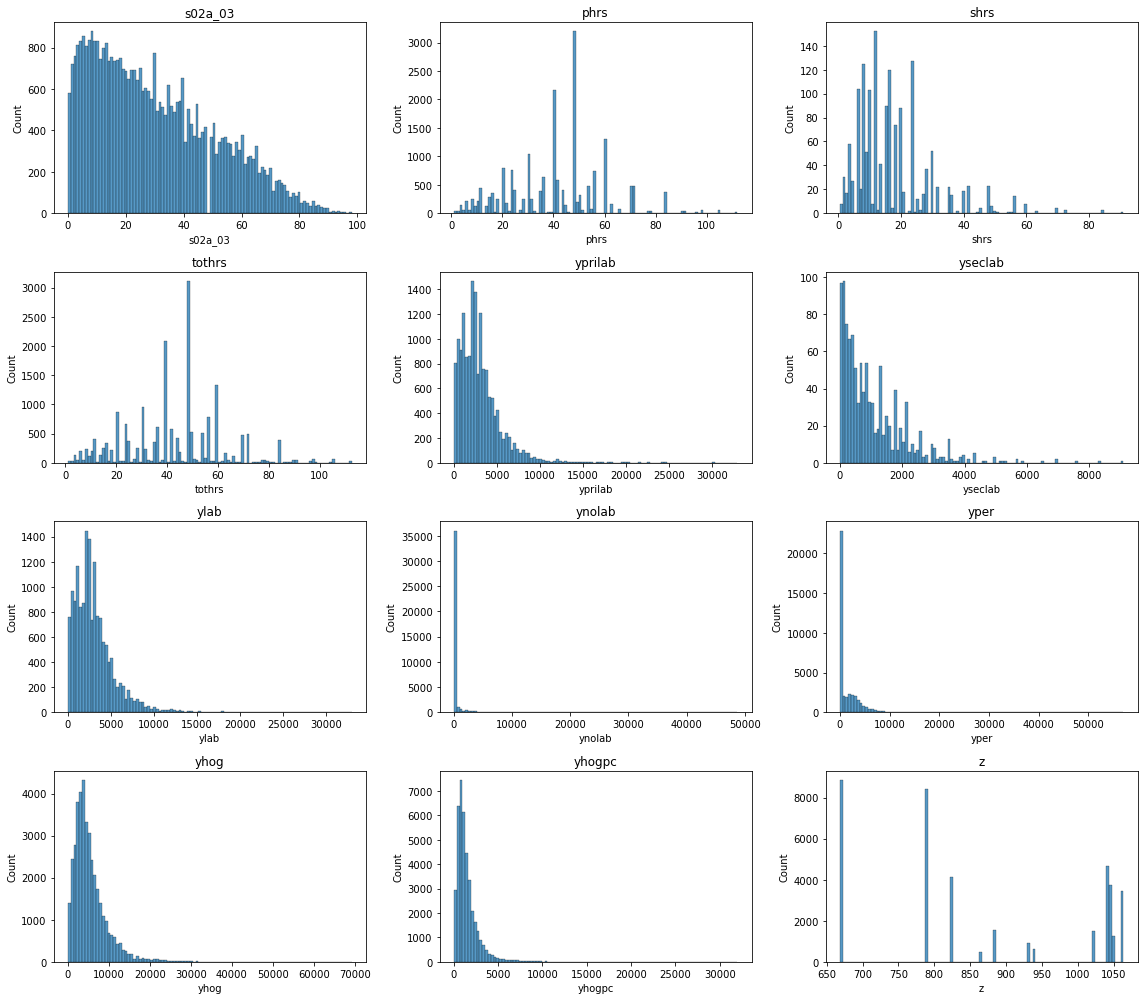

In [17]:
fig, axes = plt.subplots(4,3, figsize=(16, 14)) # 3 columnas cada una con 5 figuras, total 10 features
ax = axes.ravel()
i = 0
for column, dtype in df1.dtypes.items():
    if str(dtype).startswith('int') or str(dtype).startswith('float'):
        g = sns.histplot(data=df1[column], bins=100, ax=ax[i])
        i = i+1
        g.set_title(column, fontsize=12)
fig.tight_layout()
plt.show()

# Variables categóricas

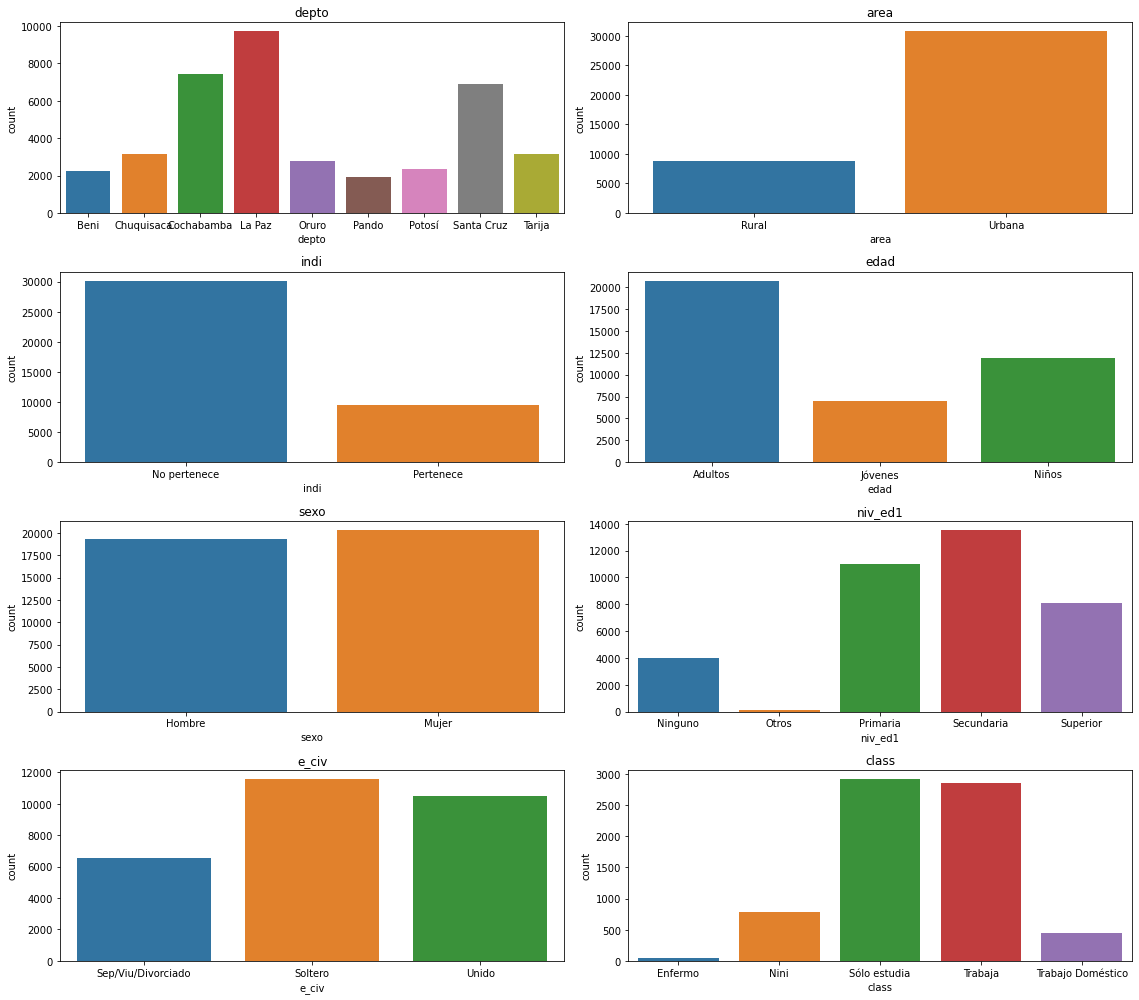

In [19]:
fig, axes = plt.subplots(4,2, figsize=(16, 14)) 
ax = axes.ravel()
i = 0
for column, dtype in df1.dtypes.items():
    if str(dtype).startswith('cat'):
        g = sns.countplot(x=column, data= df1, ax=ax[i])
        i = i+1
        g.set_title(column, fontsize=12)
fig.tight_layout()
plt.show()


#### Variables

Las variables del conjunto de datos son:

- **folio** (Identificador de la unidad primaria de muestreo)

Numéricas

- **s02a_03** (Ranges from 0 to 98).  	¿Cuántos años cumplidos tiene?.
- **phrs** (range: 1.0-112.0) Horas trabajadas a la semana Ocupación Principal.	
- **shrs** (range: 0.5-91.0) Horas trabajadas a la semana Ocupación Secundaria.
- **tothrs** (range: 1.0-112.5) Horas trabajadas a la semana
- **yprilab** (range: 10.0-32916.7)	Ingreso laboral Ocupación Principal (Bs/Mes) 	
- **yseclab** (range: 0.0-9093.0) Ingreso laboral Ocupación Secundaria (Bs/Mes) 	
- **ylab** (range: 10.0-32916.7) Ingreso laboral (Bs/Mes) 	
- **ynolab** (range: 0.0-48720.0) Ingreso no laboral (Bs/Mes)
- **yper** (range: 0.0-57033.6)	Ingreso Personal (Bs/Mes)
- **yhog** (range: 0.0-69154.3)	Ingreso del Hogar (Bs/Mes) 	
- **yhogpc** (range: 0.0-32000.0) Ingreso Percápita del Hogar
- **z** Línea de pobreza (Bs/persona/mes).

Dummy's:

- **indi** Pertenencia a los pueblos originarios.

Categóricas:

- **depto** Departamento a la cual pertenece la unidad observada.
- **area** Área de la región Úrbana o Rural del país.
- **edad** Edad categorizada
- **sexo** Sexo de la persona
- **edad** Edad categorizada
- **niv_ed1** Nivel educativo
- **e_civ** Estado Civil
- **class** Variable dependiende que recoge cinco categorias.


### Describa que insights de negocio el set de datos escogido le permitirá analizar

La relación de las categorías entre personas ocupadas y desocupados permitirá también encontrar características comunes y no comunes entre jóvenes que no estudion, ni trabajan, ni están enfermos.

### Describa las principales variables del dataset

Para este trabajo se usarán tanto las variables numéricas, categóricas como variables dummy's; la variable labels es **class** **como objetivo de clasificación**, y que indica la categorización de las personas como ser:

- 1 "Sólo estudia"
- 2 "trabajo domestico"
- 3 "Enfermo"
- 4 "NiNi"
- 5 "Trabaja"

Las variables principales que he identificado son: 

- **sexo** de la persona o jóven.
- **edad** recodificada.
- **e_civil** Estado civil

### Analice si existen valores fuera de rango. Describa en que podrían influir estos outliers

Distribución de cada variable:

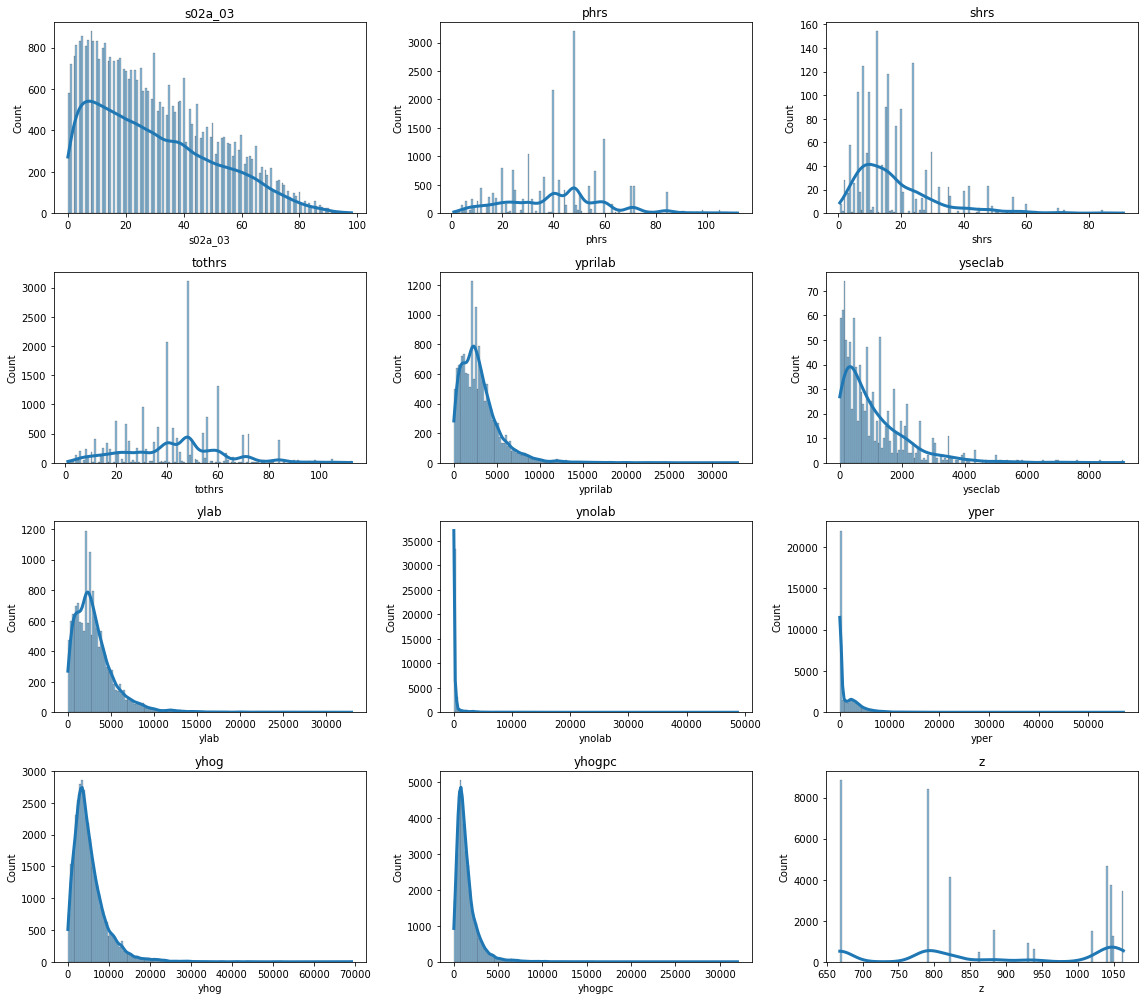

In [20]:
fig, axes = plt.subplots(4,3, figsize=(16, 14)) # 3 columnas cada una con 5 figuras, total 15 features
ax = axes.ravel()
i = 0
varNumericas=[]
for column, dtype in df1.dtypes.items():
    if str(dtype).startswith('int') or str(dtype).startswith('float'):
        g = sns.histplot(data=df1, x=column, ax=ax[i],
                         kde=True,
                         bins=150,
                         line_kws={'lw':3})
        i = i+1
        g.set_title(column, fontsize=12)
        varNumericas.append(column)
fig.tight_layout()
plt.show()

Se usará un algoritmo de detección de valores anómalos del [curso de machine learning de Andrew Ng](https://www.coursera.org/learn/machine-learning) que consta de los siguientes pasos:

1. Encontrar el modelo $p(x)$ con:

$$
\mu = \frac{1}{m} \sum_{i=1}^{m}{x}^{(i)} \\
\Sigma = \frac{1}{m} \sum_{i=1}^{m} (x^{(i)}-\mu)(x^{(i)}-\mu)^T \\
%{\sigma_j}^2 = \frac{1}{m} \sum_{i=1}^{m} ({x_j}^{(i)}-{\mu_j})^2
$$

Sabiendo que: $\Sigma \in \mathbb{R} ^{n \times n }$, y $\mu \in \mathbb{R}^n$

2. Dado un nuevo ejemplo $x$, calcular:

$$
p(x;\mu,\Sigma) = \frac{1}{(2\pi)^{n/2}\left|\Sigma\right|^{1/2}}
                  exp\left(-\frac{1}{2}(x-\mu)^{T}\Sigma^{-1}(x-\mu)\right)\\
p(x) = \frac{1}{(2\pi)^{\frac{n}{2}} {\left| \Sigma \right|}^{\frac{1}{2}}}
       exp\left(- \frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\right)
$$

Donde 

Se detecta una anomalía si $p(x) < \epsilon$, donde $\epsilon$ es un parámetro.

Este método se conoce como *multivariateGaussian*, el algoritmo entrena sobre K clusters. Entonces dado un nuevo punto, el algoritmo encuentra la distancia a cada distribución y así la probabilidad de que cada punto pertenezca a cada cluster. De esta manera si para un cluster particular, cuando la probabilidad es muy baja esto es un indicativo de que el punto es una anomalía.

El parámetro $\Sigma$ es:
$$
\Sigma = \begin{bmatrix}
 \sigma^2_1 & ... & 0 & 0 \\
 0 & \sigma^2_2 & ... & 0 \\
 0 & . & . & 0  \\
 0 & 0 & ... & \sigma^2_n 
\end{bmatrix}
$$


# Proceso de imputación de las variables cuantitativas

In [21]:
# observando el registro de missings 
dfvarNumericas = df1[varNumericas]
print(dfvarNumericas.shape)
# missings en la base de datos solo numericas
print(dfvarNumericas.isnull().sum())

(39605, 12)
s02a_03        0
phrs       20454
shrs       38037
tothrs     20454
yprilab    23859
yseclab    38516
ylab       23816
ynolab         0
yper           0
yhog          40
yhogpc        40
z              0
dtype: int64


In [22]:
# base 
for column, dtype in df1.dtypes.items():
    if str(dtype).startswith('int') or str(dtype).startswith('float'):
        df1[column] = df1[column].interpolate(method='linear',limit_direction='forward',axis=0)
df1['shrs'] =  df1['shrs'].replace(np.nan,0)
df1['yseclab'] =  df1['yseclab'].replace(np.nan,0)
df1['niv_ed1'] =  df1['niv_ed1'].fillna('Ninguno')
df1['e_civ'] =  df1['e_civ'].cat.add_categories(['Ninguno'])
df1['e_civ'] =  df1['e_civ'].fillna('Ninguno')
df1['class'] =  df1['class'].cat.add_categories(['Ninguno'])
df1['class'] =  df1['class'].fillna('Ninguno')



In [23]:
print(df1.isnull().sum())

depto      0
area       0
folio      0
s02a_03    0
phrs       0
shrs       0
tothrs     0
yprilab    0
yseclab    0
ylab       0
ynolab     0
yper       0
yhog       0
yhogpc     0
z          0
indi       0
edad       0
sexo       0
niv_ed1    0
e_civ      0
class      0
dtype: int64


In [24]:
# Dividiendo conjuntos de datos en entrenamiento 60%, testeo 20% y validación 20%
train, validate, test = \
    np.split(df1.sample(frac=1, random_state=42), 
             [int(.6*len(df1)), int(.8*len(df1))])

In [25]:
dfvarNumericas = df1[varNumericas]
m, n = dfvarNumericas.shape
train_np = np.zeros((m,n))
for i, column in enumerate(dfvarNumericas.columns):
    train_np[:, i] = np.array(dfvarNumericas[column])
#medias
mu = np.zeros((n))
for k in range(n):
    mu[k] = dfvarNumericas.iloc[:,k].mean()
# varianza
vr = np.sum((train_np - mu)**2, axis=0)
variance = vr/m
#diagonal
var_dia = np.diag(variance)

In [26]:
# Calculo de probabilidades
X = train_np - mu
#print(X)
var_dia[np.isnan(var_dia)] = 0
probs = np.zeros((m,n))
for i in range(n):
    probs[:,i] = 1/((2*np.pi)**(n/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X[i] @ np.linalg.pinv(var_dia) * X,axis=1))
probs

array([[8.22514840e-37, 1.35950176e-36, 1.72493418e-36, ...,
        2.35114090e-36, 9.23270197e-37, 1.26687153e-36],
       [1.35950176e-36, 9.58096135e-37, 1.08134102e-36, ...,
        1.33410677e-36, 1.34196744e-36, 1.18078814e-36],
       [1.72493418e-36, 1.08134102e-36, 8.79211527e-37, ...,
        8.05094043e-37, 1.68734300e-36, 1.26464567e-36],
       ...,
       [1.56774899e-34, 1.45341588e-34, 1.27844004e-34, ...,
        9.84230345e-35, 1.30477776e-34, 6.37997908e-35],
       [1.97181739e-34, 1.26966162e-34, 1.03436848e-34, ...,
        7.40879372e-35, 1.54632770e-34, 6.09773150e-35],
       [1.94463846e-34, 1.26066207e-34, 1.04691583e-34, ...,
        7.63519322e-35, 1.52673431e-34, 6.08874456e-35]])

En la variable `probs` estan calculadas las probabilidades de anomalías usando el método *Multivariante Gaussiano*, para completar la detección de valores anómalos se toma un valor de $\epsilon=0.000000000000000001$.

[43, 23, 59, 88, 182, 1500, 217, 13, 81, 141, 38, 131]


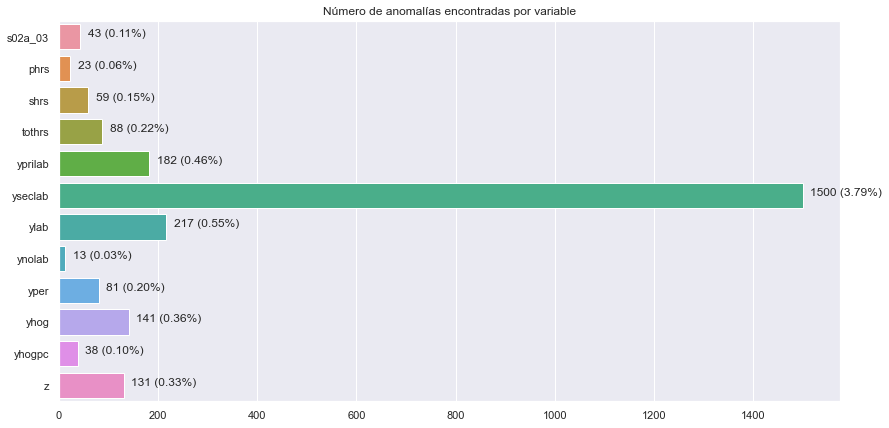

In [27]:
epsilon = 1.0e-36
# Contando anomalias
counts = []
for i, column in enumerate(dfvarNumericas.columns):
    counts.append(np.count_nonzero(probs[:,i] < epsilon))
print(counts)
sns.set(rc={'figure.figsize':(14,7)})
ax = sns.barplot(y=dfvarNumericas.columns, x=counts, orient='h')
ax.set(title='Número de anomalías encontradas por variable')

# agregando nums encima de cada barra
for i, p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    # porcentaje de anomalias en total
    percent = (counts[i]*100)/m
    
    ax.text(x=width+15,
            y=p.get_y()+(height/2),
            s='{:.0f} ({:.2f}%)'.format(width, percent),
            ha='left')

In [28]:
dfvarNumericas.shape

(39605, 12)

La gráfica anterior nos muestra que las variables con más anomalías son `yseclab, ylab, yprilab`, estas anomalías serán tratadas como *outliers* por ser valores muy atípicos.

Los outliers pueden tener un efecto grande en el entrenamiento del modelo dependiendo de la técnica, para reducir los valores atípicos se aplicará mas adelante un escalamiento de valores numéricos con el fin de minimizar su efecto durante el entrenamiento.

### Presente dos visualizaciones efectivas de variables que sean de interés para el problema planteado. Comente

#### Matriz de correlación

In [29]:
dfvarNumericas.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,s02a_03,phrs,shrs,tothrs,yprilab,yseclab,ylab,ynolab,yper,yhog,yhogpc,z
s02a_03,1.00,0.05,-0.02,0.06,0.02,0.01,0.02,0.32,0.41,0.03,0.21,0.00
phrs,0.05,1.00,0.04,0.95,0.18,0.04,0.17,-0.01,0.10,0.04,0.05,0.11
shrs,-0.02,0.04,1.00,0.09,-0.01,0.12,0.00,-0.00,-0.00,-0.01,-0.01,0.05
tothrs,0.06,0.95,0.09,1.00,0.16,0.03,0.17,-0.01,0.11,0.03,0.05,0.07
yprilab,0.02,0.18,-0.01,0.16,1.00,0.13,0.99,0.06,0.47,0.53,0.54,0.20
yseclab,0.01,0.04,0.12,0.03,0.13,1.00,0.16,0.05,0.08,0.15,0.14,0.13
ylab,0.02,0.17,0.00,0.17,0.99,0.16,1.00,0.06,0.48,0.54,0.54,0.18
ynolab,0.32,-0.01,-0.00,-0.01,0.06,0.05,0.06,1.00,0.39,0.17,0.32,0.06
yper,0.41,0.10,-0.00,0.11,0.47,0.08,0.48,0.39,1.00,0.41,0.57,0.10
yhog,0.03,0.04,-0.01,0.03,0.53,0.15,0.54,0.17,0.41,1.00,0.72,0.21


La matriz de correlaciones muestra que hay variables con alta correlación, es decir, que varian de forma similar o de relación directa, en este caso las siguientes variables tienen alta correlación:

- *yhog* y *yhogpc* con 0.72 de correlación, este valor puede ser un indicativo de que el Ingreso del Hogar (Bs/Mes)  los ingresos percapita están relacionados directamente. Esto tiene sentido considerando que el ingreso del hogar es recaudado por el jefe de hogar.
- *ylab* y *yprilab* con 0.99 entre Ingreso laboral (Bs/Mes) con Ingreso laboral Ocupación Principal (Bs/Mes).
- *tothrs* y *phrs* con 0.95 de correlación entre Horas trabajadas a la semana con Horas trabajadas a la semana Ocupación Principal.
- *yper* y *yhogpc* con 0.57 de correlación entre  	Ingreso Personal (Bs/Mes) y Ingreso Percápita del Hogar (Bs/Mes).

## Parte 2: Entrenamiento y Evaluación

### 1. Explique, en no más de cinco líneas, tres de las técnicas de clasificación vistas en la maestria que no sean redes neuronales

1. **Regresión logística** Es una técnica de regresión que permite predecir el resultado de una variable categórica, una de las principales aplicaciones de la regresión logística es la de clasificación binaria, en el que las observaciones se clasifican en un grupo u otro dependiendo del valor que tome la variable empleada como predictor.

2. **Máquinas de soporte vectorial (SVM)** Son un conjunto de métodos de aprendizaje supervisado para clasificación, regresión y deteción de valores anómalos. Entre sus ventajas están que son efectivos en espacios de varias dimensiones incluso si la dimensión es más grande que el número de muestras. Gracias al uso de funciones kernel que se pueden especificar las máquinas de soporte vectorial son versátiles.

3. **Árboles de decisión** Es un método de clasificación y regresión que tiene el objetivo de crear un modelo que predice el valor de una variable objetivo aprendiendo reglas simples de decisión inferidas a partir de las variables presentes en los datos.

### 2. Para cada técnica del punto anterior, seleccione y describa tres parámetros.

#### Regresión logística

- **Lambda (λ)** controla el equilibrio entre permitir que el modelo aumente su complejidad tanto como quiera con el intento de mantenerlo simple. Por ejemplo, si λ es muy bajo o 0, el modelo tendrá suficiente potencia para aumentar su complejidad (overfit) asignando grandes valores a los pesos de cada parámetro. Si, por otro lado, aumentamos el valor de λ, el modelo tenderá a desajustarse, ya que el modelo se volverá demasiado simple. En la biblioteca sklearn se usa C = 1/λ.

- **L1 y L2 penalty** Sirve para hacer ajustes a la penalización L1 y L2 del algoritmo de regresión logística, esto sirve para agregar penalizaciones a coeficientes grandes para reducir el nivel de sobre ajuste. La utilidad de L1 es que puede empujar los coeficientes de las características a 0, creando un método para la selección de características.

L1 / Regularización Laplaciana: 
$$
R(\beta) = |\beta_1|+|\beta_2|+...+|\beta_n| = \sum_{i=0}^{n}|\beta_i|
$$

L2 / Regularización Gaussiana: Los coeficientes tienen una distribución Gaussiana con media 0 y $\lambda=\frac{1}{\sigma^2}$

$$
R(\beta) = \frac{1}{2}(\beta_0^2+\beta_1^2+...+\beta_n^2) = \frac{1}{2} \sum_{i=0}^{n}\beta_i^2
$$

Los coeficientes son representados con $\beta$

- **max_iter** El número máximo de iteraciones que puede usar el algoritmo solucionador para converger, en la biblioteca sklean por defecto es 100.

#### Máquinas de soporte vectorial


- **C** Parámetro de regularización que controla el equilibrio entre las clasificaciones erróneas y el ancho del margen.

  - Una C pequeñas hace que las restricciones sea fáciles de ignorar por tanto se tiene un amplio margen (distancia de separación entre hiperplanos)
  - Una C grande perite que las restricciones sean difíciles de ignorar lo que lleva a un margen pequeño.

- **kernel** Especifica el tipo de kernel que será usado en el algoritmo. La biblioteca sklearn tiene disponibles 'linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’-

- **gamma** Es el coeficiente para los kernels 'rbf', 'poly' y 'sigmoid'

#### Árboles de decisión

- **criterio** Una función para medir la calidad de la división hecha. sklearn soporta el criterio "gini" para las impurezas y "entropy" para la ganancia de información. "Gini" mide las divergencias entre las probabilidades de distribución del atributo objetivo y las divide en nodos de tal forma que resulten en la menor cantidad de impurezas. La diferencia entre "Gini" y "Entropy" es que esta última puede ser un poco mas lenta de calcular por que usa una función logarítmica.

$$
Gini: Gini(E) = 1 - \sum_{j}^{c} p_j^2 \\
Entropy: H(E) = - \sum_{j=1}^{c}p_j log p_j
$$

En muchos casos la selección del criterio de división no hace mucha diferencia.
 
- **splitter** La estrategia usada para escoger la división de cada nodo de decisión, puede ser por el mejor ("best") o al azar ("random"). La estrategia "best" evalúa todas las divisiones antes y en cambio "random" usa una función uniforme al azar para hacer divisiones.

- **profundidad máxima** La profundidad teórica máxima del árbol de decisión, este parámetro se usa en cobinación con *min_samples_leaf*, *min_samples_split*. Mientras más grande este valor, mayor profundidad podría tener el árbol y resultaría en un modelo mas complejo. También el modelo puede resultar sobreajustado, por lo que reducir este valor es una forma de reducir el sobreajuste.

### 3. ¿Por qué es necesario separar los datos en conjuntos de entrenamiento, validación y testeo?

Para tener un modelo de mejor calidad es muy probable que se tengan que ajustar hiperparámetros o hacer un ajuste fino, y también es necesario tener un conjunto de datos para evaluar los resultados finales.

Una forma de entrenar el modelo es usando el conjunto de datos de entrenamiento y el de validación, cuando se tienen divididos ambos conjuntos se puede aplicar ajustes por separado pero la división inicial podría no ser la adecuada. Entonces se puede volver a dividir el conjunto de entrenamiento y de validación para volver a generar el modelo evalúandolo con el conjunto de validación primero, hacer ajustes y con el modelo obtenido se hace una evaluación final usando el conjunto de testeo.

#### Divida la base en los conjuntos de entrenamiento (60%), validación (20%) y testeo(20%).

In [30]:
# Dividiendo conjuntos de datos en entrenamiento 60%, testeo 20% y validación 20%
train, validate, test = \
    np.split(df1.sample(frac=1, random_state=42), 
             [int(.6*len(df1)), int(.8*len(df1))])

### 4. Implemente un método simple que le permita seleccionar variables. Aplíquelo y comente sus resultados.

Para la selección de variables se usará la eliminación de componentes recursiva (RFE) que selecciona variables usando cada vez menos variables para entrenar y obtener un modelo. Luego se determina la cantidad mínima de variables necesaria para que un modelo genere buenas predicciones.

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

In [32]:
#varNumericas

In [67]:
# Aplicando escalado estándar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(train[varNumericas])
X_test_std  = sc.fit_transform(test[varNumericas])
y_train = train['class']
y_test  = test['class']
#print(X_train_std)
#print(y_train)
#X_combined_std = np.vstack((X_train_std, X_test_std))
#Y_combined_std = np.hstack((t_train['popularity'], t_test['popularity']))

In [76]:
import warnings
warnings.filterwarnings('ignore')
# Preparando algoritmo de regresion logística con respuesta múltiple
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

lr.fit(X_train_std , y_train)

# predicciones usando test
y_pred = lr.predict(X_test_std)

# precision del modelo
print('Precisión del modelo con todas las variables', accuracy_score(y_test, y_pred))

Precisión del modelo con todas las variables 0.81365989142785


In [77]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline

# creando pipeline
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5, verbose=1)
lr = LogisticRegression(penalty='l2', random_state=0)
pipeline = Pipeline(steps=[('s', rfe),('m', lr)])
pipeline.fit(X_train_std, y_train)

ypredicted = pipeline.predict(X_test_std)

print('Precisión del modelo luego de aplicar la selección de 5 variables')
print(accuracy_score(y_test, ypredicted))

print("Variables seleccionadas:")
variables = list(dfvarNumericas.columns)
temp = pd.Series(pipeline.named_steps['s'].support_, index=variables)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)


Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Precisión del modelo luego de aplicar la selección de 5 variables
0.8156798384042419
Variables seleccionadas:
Index(['s02a_03', 'yprilab', 'ylab', 'ynolab', 'yper'], dtype='object')


In [36]:
print(pipeline.named_steps)
print(pipeline.named_steps['s'].support_)
print(pipeline.named_steps['s'].ranking_)

{'s': RFE(estimator=LogisticRegression(), n_features_to_select=5, verbose=1), 'm': LogisticRegression(random_state=0)}
[ True False False False  True False  True  True  True False False False]
[1 6 8 2 1 7 1 1 1 3 4 5]


Aplicando RFE y solo seleccionando 5 variables se ha conseguido una precisión de 0.0.81744 que es ligeramente superior al modelo entrenado con todas las variables, el método RFE ([*recursive feature elimination*](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)) retorna las variables *'s02a_03', 'yprilab', 'ylab', 'ynolab', 'yper'* como las mejores de un conjunto fijado por nosotros de 5 para generar el mejor modelo. Esto sugiere que las demás variables pueden no aportan con mucha información útil para las predicciones.

### 5. Entrene un modelo por cada técnica del punto (1) y compare sus resultados.

Analizando la matriz de confusión. Para ello deberá escoger al menos tres indices de interés para medir la calidad de las soluciones como la curva ROC, el KS (Test de Kolmogorov-Smirnov), etc. Comente en que se basa su decisión de utilizar estos 3 indicadores.

#### Regresión logística

In [37]:
from sklearn.model_selection import train_test_split

# Aplicando escalado estándar
sc = StandardScaler()
_data = df1.copy()
_data[variables] = sc.fit_transform(_data[variables])
_X_train, X_test, _y_train, y_test = train_test_split(_data[variables],
                                                      _data['class'],
                                                      test_size=0.20,
                                                      random_state=42)
print(_X_train.shape, X_test.shape)

(31684, 12) (7921, 12)


In [38]:
import random

# Entrenando
C = [10, 1, .1, .001]
# Probando distintos valores C para regularización
best_test_score = 0
lr_scores = []
lr_model = None 
# Haciendo 4 pruebas usando el dataset de validacion
for i in range(0,4):
    X_train, X_validate, \
    y_train, y_validate = train_test_split(_X_train,
                                           _y_train,
                                           test_size=0.20,
                                           random_state=random.randint(1,100))
    #print(X_train.shape, X_validate.shape, y_train.shape, y_validate.shape)
    maModel = None
    bestTrainScore = 0
    bestValidateScore = 0
    print('Validation dataset {0}:\n'.format(i))
    for c in C:
        clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
        clf.fit(X_train, y_train)
        #print('C:', c)
        #print('Coefficient of each feature:', clf.coef_)
        trainScore = clf.score(X_train, y_train)
        validateScore = clf.score(X_validate, y_validate)
        #print('  Training accuracy:', trainScore)
        #print('  Validation accuracy:', validateScore)
        if maModel is None:
            maModel = clf
        if trainScore > bestTrainScore \
           and validateScore > bestValidateScore:
            bestTrainScore = trainScore
            bestValidateScore = validateScore
            maModel = clf
    #print('')
    testScore = maModel.score(X_test, y_test)
    lr_scores.append(testScore)
    print(' Test score:', testScore)
    if testScore > best_test_score:
        best_test_score = testScore
        lr_model = maModel
print('Best accuracy found', testScore)

Validation dataset 0:

 Test score: 0.8202247191011236
Validation dataset 1:

 Test score: 0.8198459790430501
Validation dataset 2:

 Test score: 0.8199722257290746
Validation dataset 3:

 Test score: 0.8198459790430501
Best accuracy found 0.8198459790430501


In [39]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
#print('Coefficient of each feature:', clf.coef_)
trainScore = clf.score(X_train, y_train)
validateScore = clf.score(X_validate, y_validate)

In [40]:
print(trainScore)
print(validateScore)

0.8522902118593917
0.8532428593971911


### Máquinas de soporte vectorial

In [41]:
from sklearn.svm import SVC

C = [10, 1, .1, .001]
svm_scores = []
best_test_score = 0
svm_model = None

for i in range(0,4):
    X_train, X_validate, \
    y_train, y_validate = train_test_split(_X_train,
                                           _y_train,
                                           test_size=0.20,
                                           random_state=random.randint(1,100))
    maModel = None
    bestTrainScore = 0
    bestValidateScore = 0
    print('Validation dataset {0}:\n'.format(i))
    clf = SVC(C=c, gamma='auto', probability=True)
    clf.fit(X_train, y_train)
    trainScore = clf.score(X_train, y_train)
    validateScore = clf.score(X_validate, y_validate)
    print('  Training accuracy:', trainScore)
    print('  Validation accuracy:', validateScore)
    if maModel is None:
        maModel = clf
    if trainScore > bestTrainScore \
        and validateScore > bestValidateScore:
        bestTrainScore = trainScore
        bestValidateScore = validateScore
        maModel = clf
    testScore = maModel.score(X_test, y_test)
print(' Test score:', testScore)
if testScore > best_test_score:
    best_test_score = testScore
    svm_model = maModel
print('Best accuracy found', testScore) 

Validation dataset 0:

  Training accuracy: 0.8217146013334912
  Validation accuracy: 0.8264162853085056
Validation dataset 1:

  Training accuracy: 0.8231348877579201
  Validation accuracy: 0.820735363736784
Validation dataset 2:

  Training accuracy: 0.8238844833708131
  Validation accuracy: 0.8177370995739309
Validation dataset 3:

  Training accuracy: 0.8232532449599558
  Validation accuracy: 0.8202619536058071
 Test score: 0.8202247191011236
Best accuracy found 0.8202247191011236


### Árboles de decisión

In [42]:
from sklearn.tree import DecisionTreeClassifier

best_test_score = 0
dt_model = None
dt_scores = []

# Haciendo 4 pruebas usando el dataset de validacion
for i in range(0,4):
    X_train, X_validate, \
    y_train, y_validate = train_test_split(_X_train,
                                           _y_train,
                                           test_size=0.20,
                                           random_state=random.randint(1,100))
    #print(X_train.shape, X_validate.shape, y_train.shape, y_validate.shape)
    maModel = None
    bestTrainScore = 0
    bestValidateScore = 0
    print('Validation dataset {0}:\n'.format(i))
    for depth in [2,3,6,9]:
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(X_train, y_train)
        #print('max_depth: {0}'.format(depth))
        #print('Coefficient of each feature:', clf.coef_)
        trainScore = clf.score(X_train, y_train)
        validateScore = clf.score(X_validate, y_validate)
        #print('  Training accuracy:', trainScore)
        #print('  Validation accuracy:', validateScore)
        if maModel is None:
            maModel = clf
        if trainScore > bestTrainScore \
           and validateScore > bestValidateScore:
            bestTrainScore = trainScore
            bestValidateScore = validateScore
            maModel = clf
    #print('')
    testScore = maModel.score(X_test, y_test)
    dt_scores.append(testScore)
    if testScore > best_test_score:
        best_test_score = testScore
        dt_model = maModel
    testScore = maModel.score(X_test, y_test)
    print(' Test score:', testScore)
print('Best accuracy found', testScore) 

Validation dataset 0:

 Test score: 0.9534149728569625
Validation dataset 1:

 Test score: 0.9563186466355258
Validation dataset 2:

 Test score: 0.9534149728569625
Validation dataset 3:

 Test score: 0.9553086731473299
Best accuracy found 0.9553086731473299


#### Comparando resultados con la curva ROC

Se utilizará el análisis del área bajo la curva ROC (*Area Under Curve - Receiver operating Characteristics*) para comparar el modelo de machine learning mas adecuado. Para este análisis se usa:

- Matriz de confusión
- Se miden TP (Verdaderos positivos), FN (Falsos negativos), TN (Verdaderos negativos) y FP (Falsos positivos).
- Errores de tipo 1 y tipo 2
- Estadísticas de cáulculo como *recall*, *precision* y *F-Score*
- Área bajo la curva ROC y selección de modelo

Donde:

$$
Recall = \frac{TP}{TP + FN} \\
Precision = \frac{TP}{TP + FP} \\
F-score = \frac{2*Recall*Precision}{Recall+Precision}
$$

Confusion matrix, without normalization
[[   0   13    0    0    0    0]
 [   0 6457    1    4   35    0]
 [   0  154    1    1    0    0]
 [   0  590    0    3    2    0]
 [   0  562    0    0    3    0]
 [   0   93    0    0    2    0]]


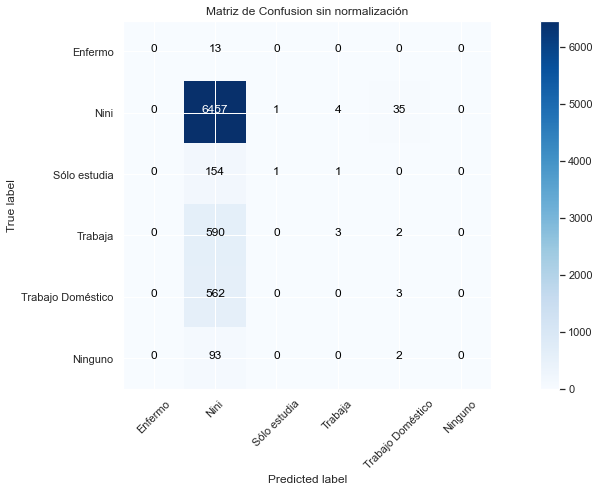

In [44]:
# mostrando la matriz de confusión por cada algoritmo
#from sklearn.metrics import plot_confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#disp = plot_confusion_matrix(lr_model, X_test, y_test, display_labels=class_names, normalize='false')
#disp.ax_.set_title("Matriz de confusión clasificación por Regresión Logística Multinomial")

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names=('Enfermo', 'Nini', 'Sólo estudia', 'Trabaja', 'Trabajo Doméstico', 'Ninguno')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Matriz de Confusion sin normalización')
plt.show()

Text(0.5, 1.0, 'Matriz de confusión clasificación por Regresión Logística Multinomial')

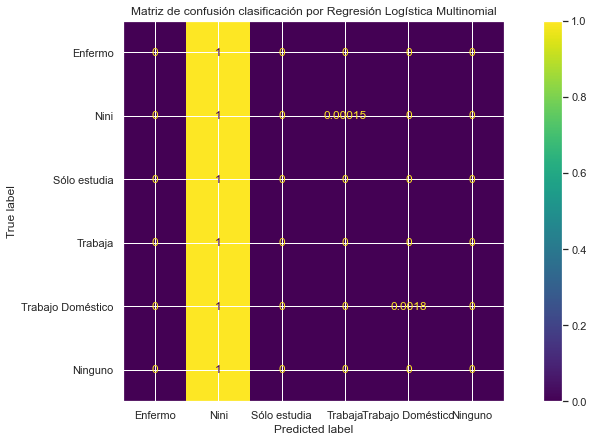

In [45]:
# mostrando la matriz de confusión por cada algoritmo
from sklearn.metrics import plot_confusion_matrix
class_names=('Enfermo', 'Nini', 'Sólo estudia', 'Trabaja', 'Trabajo Doméstico','Ninguno')
disp = plot_confusion_matrix(lr_model, X_test, y_test, normalize='true', display_labels=class_names)
disp.ax_.set_title("Matriz de confusión clasificación por Regresión Logística Multinomial")

Text(0.5, 1.0, 'Matriz de confusión clasificación por Máquinas de Soporte Vectorial')

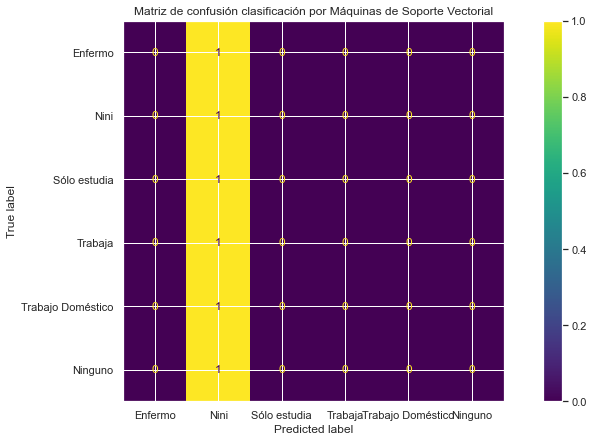

In [46]:
disp = plot_confusion_matrix(svm_model, X_test, y_test,
                             normalize='true', display_labels=class_names)
disp.ax_.set_title("Matriz de confusión clasificación por Máquinas de Soporte Vectorial")

El gráfico anterior muestra que la clasificación usando máquinas de soporte vectorial no logra clasificar una categoria 'ninguno' de la variable 'class'.


Text(0.5, 1.0, 'Matriz de confusión clasificación por Árboles de decisión')

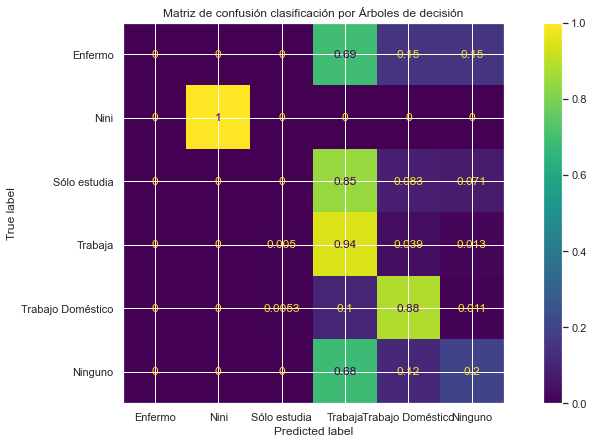

In [47]:
disp = plot_confusion_matrix(dt_model, X_test, y_test,
                             normalize='true', display_labels=class_names)
disp.ax_.set_title("Matriz de confusión clasificación por Árboles de decisión")

De las tres matrices de confusión la que parece más equilibrada es la clasificación por árboles de decisión.

Continuando con el análisis, usaremos el **área bajo la curva ROC** como indicador de las predicciones hechas por los diferentes algoritmos.

In [48]:
# Probabilidades para los datos de test por cada modelo y área bajo la curva ROC
from sklearn.metrics import roc_auc_score
probs = {
    'LogisticRegression': lr_model.predict_proba(X_test),
    'SupportVector': svm_model.predict_proba(X_test),
    'DecisionTree': dt_model.predict_proba(X_test)
}
# AUC score
auc_results = {
    'LogisticRegression': {
        'score': roc_auc_score(y_test, probs['LogisticRegression'], multi_class='ovo'),
        #'fpr-tpr-thresholds': roc_curve(y_test, probs['LogisticRegression'])
    },
    'SupportVector': {
        'score': roc_auc_score(y_test, probs['SupportVector'], multi_class='ovo'),
        #'fpr-tpr-thresholds': roc_curve(y_test, probs['SupportVector'])
    }, 
    'DecisionTree': {
        'score': roc_auc_score(y_test, probs['DecisionTree'], multi_class='ovo'),
        #'fpr-tpr-thresholds': roc_curve(y_test, probs['DecisionTree'])
    }
}
auc_results

{'LogisticRegression': {'score': 0.697531382044784},
 'SupportVector': {'score': 0.7570280355604726},
 'DecisionTree': {'score': 0.8170386661421853}}

La anterior métrica muestra el área bajo la curva (ROC AUC) de los puntajes de predicción por cada algoritmo de clasificación. Una **curva ROC** tiene en el eje X la tasa TRP o de falsos positivos (cuando se predice positivo pero en realidad es negativo) y de verdaderos positivos (cuando se predice positivo y en realidad es positivo) en el eje Y. Entonces cuando el área sobre la curva ROC es más alto, se dice que el algoritmo de machine learning es mejor distinguiendo las clases dadas.

Se muestra el algoritmo con la curva ROC más alta al de árboles de decisión, luego el de máquina de vector soporte y  regresión logística multinomial. Es importante recalcar que si bien el algoritmo de árboles de decisión es el que mejor puntaje tiene, también este algoritmo es conocido por sobreajustarse mucho.

### 6. Modelo de una red neuronal optimizando sus parámetros

como se vio en clases y compárela con las mismas métricas utilizada anteriormente para los otros algoritmos y
comente que algoritmos de todos los calculados es el mejor basado en las métricas escogidas.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [50]:
# Preparando la etiqueta de salida, se crea una columna por cada posible etiqueta de canciones
y_train_dummies = pd.get_dummies(_y_train)
y_test_dummies = pd.get_dummies(y_test)
y_train_dummies.head()


,Enfermo,Nini,Sólo estudia,Trabaja,Trabajo Doméstico,Ninguno
14471,0,0,0,0,0,1
38193,0,0,0,0,0,1
27379,0,0,0,0,0,1
4562,0,0,0,0,0,1
25341,0,0,0,0,0,1


Estableciendo la arquitectura de la red

Se probarán distintos números de epochs y número de nodos en la capa oculta partiendo de la base de 15 hasta 17.


In [51]:
# Código adaptado
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential   #(keras v 2.2.1)
from keras.layers import Dense

n_modelos = 4
n_nodos_capa = 14 # nodos en la capa oculta

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    '''Una funcion para crear redes neuronales.'''
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

n_features = _X_train.shape[1]
n_classes = y_train_dummies.shape[1]

print("======GENERALES=======")
print("n_features \t=\t"+str(n_features))
print("n_classes \t=\t"+str(n_classes))
print("n_modelos \t=\t"+str(n_modelos))
print("======================\n\n")

Using TensorFlow backend.


======GENERALES=======
n_features 	=	12
n_classes 	=	6
n_modelos 	=	4




In [52]:
# generando multiples modelos para hacer entrenamientos
models = [create_custom_model(n_features, n_classes, 
                              14+i, # nodos en la capa oculta 
                              i, 'model_{0}_nodos-{1}'.format(i, 14+i)) for i in range(1, n_modelos)]

for create_model in models:
    ## create_model es solo una instancia de la FUNCION create_custom_model
    ## El objeto instanciado con la red que hemos creado, esta en create_model()
    create_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                195       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 96        
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                208       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 102       
Total params: 582
Trainable params: 582
Non-trainable params: 0
______________

In [53]:
print(X_test.shape)
print(_X_train.shape)
print(_y_train.shape)
print(y_test.shape)

(7921, 12)
(31684, 12)
(31684,)
(7921,)


#### Entrenando los modelos

In [55]:
# código adaptado de los ejercicios en clases
from sklearn.preprocessing import OneHotEncoder

history_dict = {} ##para los valores
matrices = {} ##para las matrices de confusion

# un onjeto con las variables dummies
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit_transform(y_train.cat.codes[:,np.newaxis])

# Entrenando cada modelo
for create_model in models:   
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(_X_train, y_train_dummies,
                                 batch_size=128,
                                 epochs=10,
                                 verbose=0,
                                 validation_data=(X_test, y_test_dummies),## esto es analogo a validation_split = 0.1)
                                )
    
    ##Para cada modelo evaluo con el test set al fin de su entrenamiento
    ##Imprimo los resultados
    score = model.evaluate(X_test, y_test_dummies, verbose=1)
    #score = model.evaluate(X_test, y_test_dummies, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(score)
    
    ### Genero la predicción con el modelo
    y_pred = model.predict(X_test)
    #print(y_pred)
    ### La red da números flotantes, no genera enteros!
    ### Para poder interpretar como corresponde los valores, debemos hacer la siguiente operación
    #y_pred[y_pred <= 0.5] = 0
    #y_pred[y_pred > 0.5] = 1
    
    y_pred_1col = pd.DataFrame(enc.inverse_transform(y_pred), columns= ['target'])
    ## Esta se puede hacer fuera del for para no hacerlo cada vez..
    ## Pero por claridad esta aqui.
    y_test_1col = pd.DataFrame(enc.inverse_transform(y_test_dummies), columns= ['target'])
    
    ##genero la matriz pero los labels DEBEN ser las categorias que vienen en los datos
    ##lo que viene aqui son valores 1,2,3...
    cf_matrix = confusion_matrix(y_pred_1col, y_test_1col, labels=[1,2,3,4,5,6])
    
    ###Codifico los dataframes con las etiquetas categoricas para que sea mas amigable
    #y_pred_1col = y_pred_1col.replace(to_replace = [1,2,3,4,5,6] ,value = names)
    #y_test_1col = y_test_1col.replace(to_replace = [1,2,3,4,5,6] ,value = names)
    
    ##Ahora los valores de los datos no son 0,1,2 si no que ['popular' 'moderada' 'no popular']
    ##por eso labels se usa la variable names, que contiene esta lista.
    matrices[model.name] = confusion_matrix(y_test_1col, y_pred_1col)  #, labels=names
    
    print(matrices[model.name])
    print("================================ \n")
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1_nodos-15
7921/7921 [==============================] - 0s 11us/step
Test loss: 0.29564184454591746
Test accuracy: 0.8971089509201386
[0.29564184454591746, 0.8971089509201386]
[[   0    0    5    0    0    8]
 [   0    0   62    4    0   90]
 [   0    0  275   11    0  309]
 [   0    0   18  358    0  189]
 [   0    0   46    1    0   48]
 [   0    0    4   20    0 6473]]

Model name: model_2_nodos-16
7921/7921 [==============================] - 0s 17us/step
Test loss: 0.16474186431434537
Test accuracy: 0.9487438454815812
[0.16474186431434537, 0.9487438454815812]
[[   0    0   10    3    0    0]
 [   0    0  128   13    0   15]
 [   0    0  532   27    2   34]
 [   0    0   51  499    1   14]
 [   0    0   82    6    0    7]
 [   0    0    3   10    0 6484]]

Model name: model_3_nodos-17
7921/7921 [==============================] - 0s 13us/step
Test loss: 0.14212939005851624
Test accuracy: 0.9519000126321935
[0.14212939005851624, 0.9519000126321935]
[[   0    0    9  

In [56]:
# código adaptado de los ejercicios en clases
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        

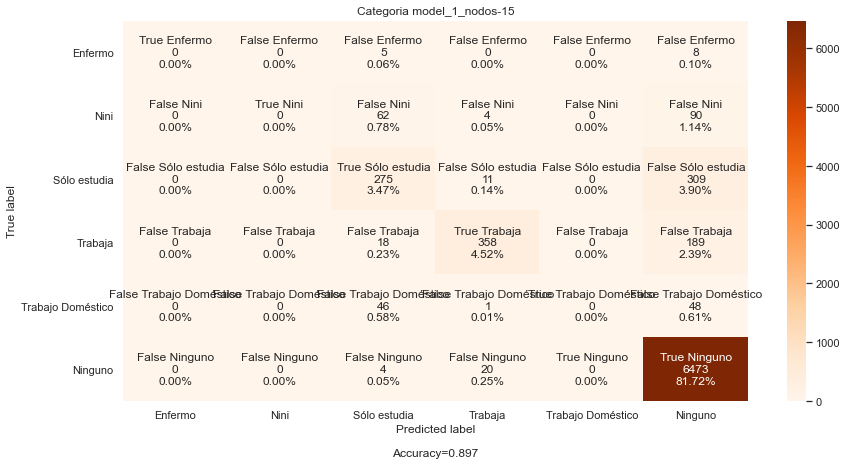

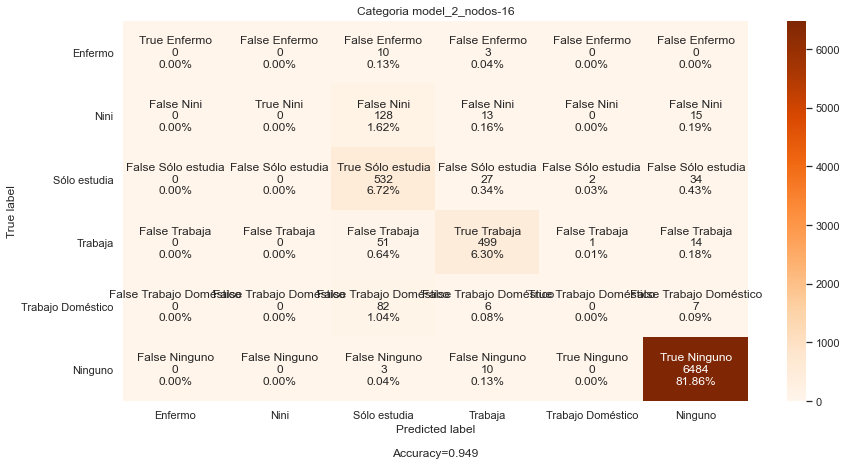

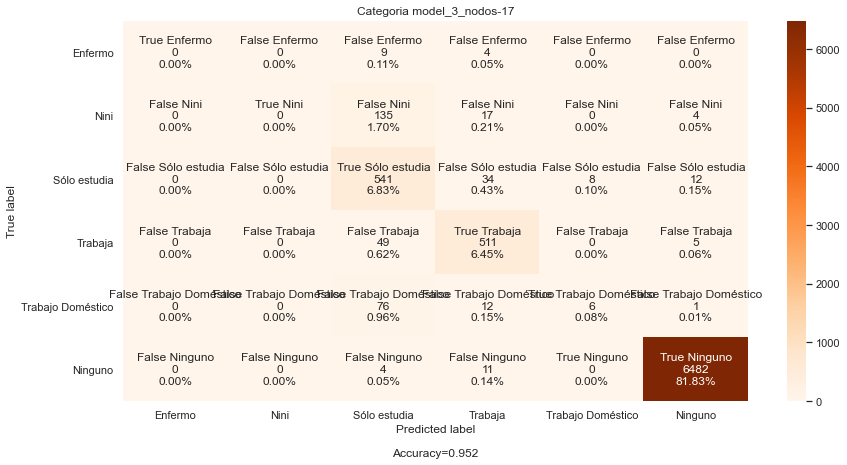

In [57]:
## Genero las matrices con la funcion de arriba
labels = ['True Enfermo','False Enfermo','False Enfermo','False Enfermo', 'False Enfermo','False Enfermo',
          'False Nini'  , 'True Nini'   , 'False Nini'  ,'False Nini'   , 'False Nini'   ,'False Nini'   ,
          'False Sólo estudia', 'False Sólo estudia', 'True Sólo estudia','False Sólo estudia','False Sólo estudia', 'False Sólo estudia', 
          'False Trabaja', 'False Trabaja', 'False Trabaja','True Trabaja', 'False Trabaja', 'False Trabaja', 
          'False Trabajo Doméstico', 'False Trabajo Doméstico', 'False Trabajo Doméstico', 'False Trabajo Doméstico','True Trabajo Doméstico', 'False Trabajo Doméstico', 
          'False Ninguno', 'False Ninguno', 'False Ninguno', 'False Ninguno','True Ninguno', 'True Ninguno']

names = ('Enfermo', 'Nini', 'Sólo estudia', 'Trabaja', 'Trabajo Doméstico','Ninguno')
categories = names ##Yes/no..en este caso, los nombres de las clases

for model_name in matrices:
    make_confusion_matrix(matrices[model_name], group_names=labels, categories=categories, 
                          cmap='Oranges', title='Categoria '+str(model_name))

#### Graficando el Accuracy y Loss

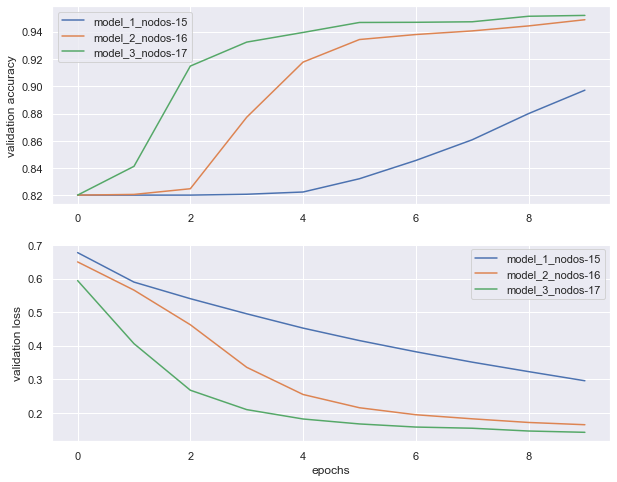

In [58]:
#for model_name in history_dict:
#    print(history_dict[model_name][0].history['val_acc'])


fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();

#### Calculando la curva ROC

Las curvas ROC se pueden calcular para una variable binaria. Hay algunos mecanismos para poder generar estas curvas con una variable que tenga 6 clases. pero NO es posible generarla para más de tres clases. Algo bueno, es que python permite generarlas en este caso donde si tenemos 3 clases de forma simple.

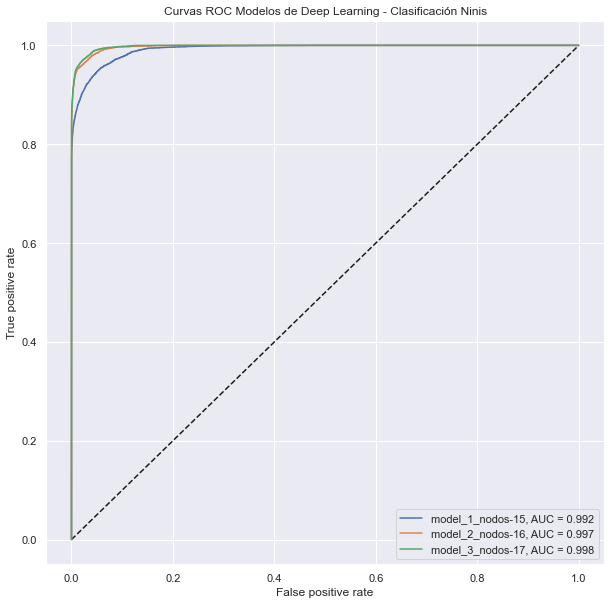

In [59]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    
    #fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    fpr, tpr, threshold = roc_curve(np.array(y_test_dummies).ravel(), 
                                    Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))

    plt.xlabel('False positive rate')
    
    
plt.ylabel('True positive rate')
plt.title('Curvas ROC Modelos de Deep Learning - Clasificación Ninis')
plt.legend();

Del anterior gráfico vemos que la curva ROC de los tres modelos resultado del entrenamiento con redes neuronales es prácticamente el mismo y resulta en un 0.998 para el modelo 3, 0.997 para el modelo 2 y 0.993 para el modelo 1.

7. Finalmente, comente el grado de sobre ajuste y sub ajuste del modelo basado en redes neuronales.

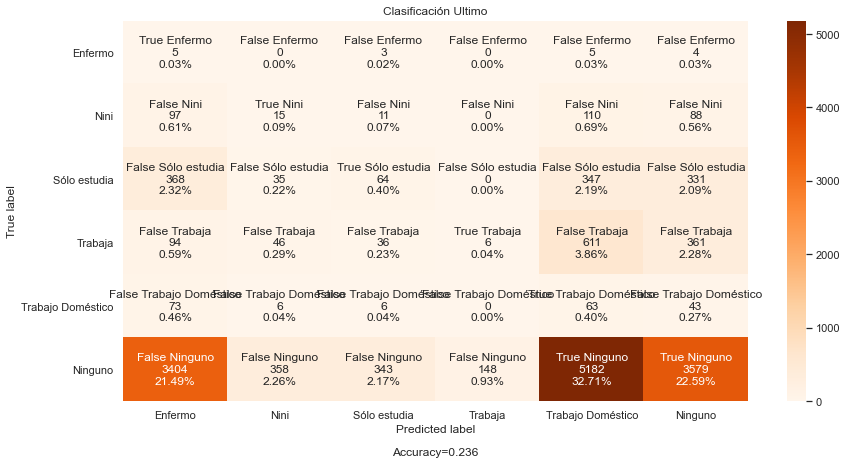

In [60]:
# Generando predicciones para un nuevo conjunto de testeo mas grande
_X_train, X_test, _y_train, y_test = train_test_split(_data[variables],
                                                      _data['class'],
                                                      test_size=0.40, # 40%
                                                      random_state=22)

y_test_dummies = pd.get_dummies(y_test.replace(to_replace=[1,2,3,4,5,6], value = names))

y_pred = models[-1]().predict(X_test)
#y_pred[y_pred <= 0.5] = 0
#y_pred[y_pred > 0.5] = 1

y_pred_1col = pd.DataFrame(enc.inverse_transform(y_pred), columns= ['target'])
y_test_1col = pd.DataFrame(enc.inverse_transform(y_test_dummies), columns= ['target'])

cf_matrix = confusion_matrix(y_pred_1col, y_test_1col, labels=[1,2,3,4,5,6])
    
cm = confusion_matrix(y_test_1col, y_pred_1col) #labels=names

make_confusion_matrix(cm, group_names=labels, categories=categories, 
                      cmap='Oranges', title='Clasificación '+str('Ultimo'))

La prueba anterior muestra que ahora luego de seleccionar nuevamente el conjunto de pruebas, se tiene un accuracy de 0.087. Esto muestra que el entrenamiento con redes neuronales realizado se ha sobre ajustado mucho sobre todo al predecir de manera errónea si una pista no es de de una categoria de los ninis con un 13.18% de falsos positivos.

Por tanto, es necesario realizar ajustes en el entrenamiento del modelo, considerar los outliers detectados anteriormente y realizar nuevamente el entrenamiento.


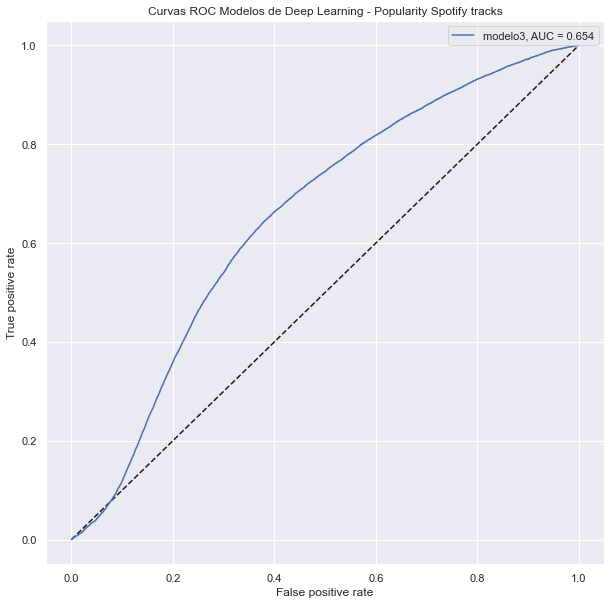

In [61]:
fpr, tpr, threshold = roc_curve(np.array(y_test_dummies).ravel(), 
                                y_pred.ravel())

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format('modelo3', auc(fpr, tpr)))
plt.xlabel('False positive rate')

plt.ylabel('True positive rate')
plt.title('Curvas ROC Modelos de Deep Learning - Popularity Spotify tracks')
plt.legend();

De igual manera el área bajo la curva ROC muestra 0.285 que es un valor bajo y confirma el mal desempeño del modelo